# AgenticVision - Version 1.0:
#### End-to-end ML system to investigate whether encrypted packet-level telemetry can be used to infer AI workload intent and workflow structure in a privacy-preserving manner.

In [108]:
#Import libraries:
import polars as pl
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score 
from sklearn.metrics import precision_score, accuracy_score,f1_score,recall_score
import joblib


In [141]:
#Load the data
df = load_breast_cancer()
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target, name ="target")
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [116]:
#Linear Regression Model: for contineous variable prediction
#Split the data into (Train + Validation) and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Setup the pipeline for future applications
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegressionCV(
        Cs=[0.01,0.1,1,10],
        cv=100,
        scoring="recall",
        max_iter = 1000,
        verbose=2,
        solver= "lbfgs",
        n_jobs=-1
        ))
])

pipe.fit(X_train, y_train)#train model and select best

joblib.dump(pipe, "LR_model.pkl") # store model


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


['LR_model.pkl']

In [122]:
LR_model = joblib.load("LR_model.pkl")

y_pred = LR_model.predict(X_test)


In [123]:
# Flatten y_pred to 1D
y_pred_flat = y_test.ravel()  # or y_pred.flatten()

# Build the DataFrame
results = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred_flat
})
results

C:\Users\AS9Wa\AppData\Local\Temp\ipykernel_24628\3201969005.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_pred_flat = y_test.ravel()  # or y_pred.flatten()


,y_true,y_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
109,1,1
110,0,0
111,1,1
112,1,1


In [124]:
print("accuracy", round(accuracy_score(y_test, y_pred),3))
print("recall", round(recall_score(y_test, y_pred),3))
print("precison", round(precision_score(y_test, y_pred),3))
print("f1", round(f1_score(y_test, y_pred),3))


accuracy 0.965
recall 1.0
precison 0.947
f1 0.973


In [146]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

y = df["mean radius"]
X = df.drop(columns=["mean radius"])


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe.fit(X_train, y_train) #train the model

joblib.dump(pipe, "Lin_regression_model.pkl")


['Lin_regression_model.pkl']

In [147]:
model = joblib.load("Lin_regression_model.pkl")

In [148]:
y_pred = model.predict(X_test)

In [152]:
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)
print(r2)
print(mae)
print(mse)

0.9996034230414952
0.04446204183813689
0.0047876129546283955


In [153]:
residuals = y_test-y_pred

results = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "residual": residuals
})

results.head()

,y_true,y_pred,residual
204,12.47,12.529554,-0.059554
70,18.94,18.946483,-0.006483
131,15.46,15.502080,-0.042080
431,12.40,12.347646,0.052354
540,11.54,11.537132,0.002868


In [154]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'breast radius')

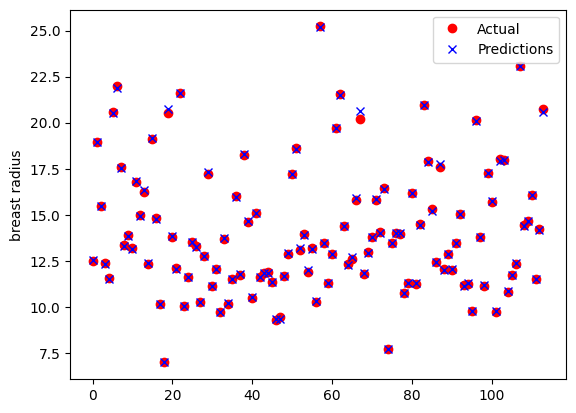

In [163]:
plt.plot(y_test.values, 'r', marker = 'o', linestyle='', label = "Actual") 
plt.plot(y_pred, 'b', marker = 'x', linestyle='', label = "Predictions")
plt.legend() 
plt.ylabel("breast radius")